In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.datasets import cifar10

In [4]:
(X_train,y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_test.shape

(10000, 1)

In [10]:
X_train[0].shape

(32, 32, 3)

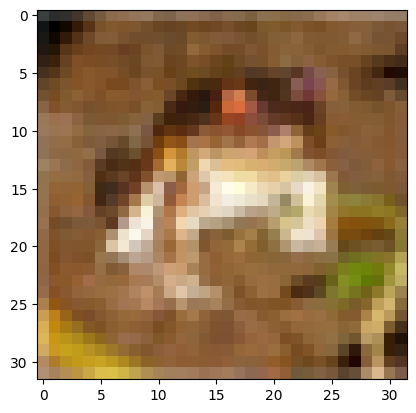

In [11]:
plt.imshow(X_train[0])

In [12]:
y_train[0]

array([6], dtype=uint8)

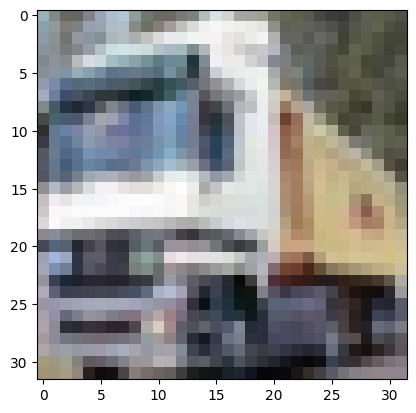

In [13]:
plt.imshow(X_train[1])

In [39]:
y_train[1]

array([9], dtype=uint8)

In [14]:
X_train[0][0:, 0:, 0].shape

(32, 32)

Visualising a single image in B&W format.

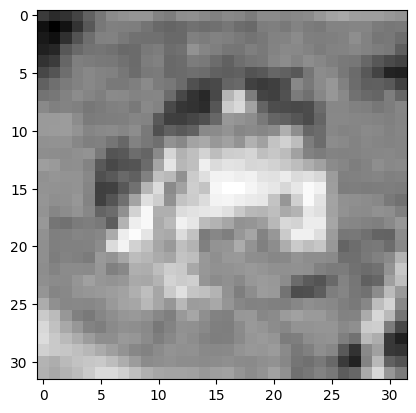

In [15]:
plt.imshow(X_train[0][0:,0:,0], cmap='gray')

In [16]:
np.where(y_train == 0)

(array([   29,    30,    35, ..., 49941, 49992, 49994]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [17]:
len(np.where(y_train == 0)[0])

5000

In [18]:
indices_label_0 = np.where(y_train == 0)[0]

In [19]:
indices_label_0

array([   29,    30,    35, ..., 49941, 49992, 49994])

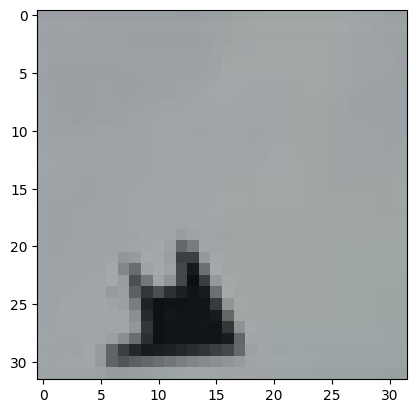

In [22]:
plt.imshow(X_train[49994])

airplane - 0

automobile - 1

bird - 2

cat - 3

deer - 4

dog - 5

frog - 6

horse - 7

ship - 8

truck - 9

### PreProcessing the Data

In [23]:
### Checking the Train & Test features

In [24]:
X_train.max()

255

In [25]:
X_train.min()

0

In [26]:
X_test.max()

255

In [27]:
X_test.min()

0

#### Bringing all the pixel values to 0 to 1 range

In [28]:
X_train = X_train / 255
X_test = X_test / 255

In [29]:
X_train.shape

(50000, 32, 32, 3)

In [31]:
print(X_train.max())
print(X_train.min())

1.0
0.0


In [32]:
print(X_test.max())
print(X_test.min())

1.0
0.0


In [22]:
# sns.kdeplot(X_train)

Converting the number labels into categorical format using OneHotEncoding Technique

In [33]:
from keras.utils import to_categorical

Checking the total number of classes & their frequency in the dataset.

In [34]:
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [35]:
y_train_df.value_counts()

0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
dtype: int64

In [36]:
y_test_df.value_counts()

0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
dtype: int64

Converting the classes into one hot coding format

In [37]:
y_train_categorical = to_categorical(y=y_train,num_classes=10)
y_test_categorical = to_categorical(y=y_test,num_classes=10)

In [38]:
y_train.shape

(50000, 1)

In [39]:
y_train_categorical.shape

(50000, 10)

In [40]:
y_train[0]

array([6], dtype=uint8)

In [41]:
y_train_categorical[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

Now our data is ready to be fed to the model.

Let's now design our Neural Network to get the Prediction Model.

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
# from keras.metrics import accuracy_score, confusion_matrix

In [52]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128,activation='relu',))

model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics='accuracy'
            )

In [ ]:
model.fit()

In [53]:
model.fit(X_train, y_train_categorical,epochs=10, verbose='auto')

Epoch 1/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5606 - accuracy: 0.4425
Epoch 2/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.2085 - accuracy: 0.5774
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0634 - accuracy: 0.6295
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9693 - accuracy: 0.6644
Epoch 5/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.8909 - accuracy: 0.6942
Epoch 6/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8335 - accuracy: 0.7150
Epoch 7/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.7816 - accuracy: 0.7328
Epoch 8/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7370 - accuracy: 0.7494
Epoch 9/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.6980 - accuracy: 0.7610
Epoch 10/10
1563/1563 [==============================] - 38s 24m

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)              

In [56]:
model.evaluate(X_test,y_test_categorical)

313/313 [==============================] - 2s 6ms/step - loss: 1.0549 - accuracy: 0.6830


[1.0549335479736328, 0.6830000281333923]

In [58]:
model.metrics_names

['loss', 'accuracy']

In [59]:
from sklearn.metrics import classification_report

In [67]:
prediction_probabilities = model.predict(X_test)
real_time_prediction_result = np.argmax(prediction_probabilities, axis=1) # axis=1 means finding the indices of the maximum values in row wise &
# axis=0 means finding the the indices of the maximum value in column wise.


313/313 [==============================] - 2s 6ms/step


In [66]:
real_time_prediction_result

array([3, 1, 8, ..., 5, 1, 7])

In [69]:
print(classification_report(y_test,real_time_prediction_result))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70      1000
           1       0.84      0.78      0.80      1000
           2       0.64      0.48      0.55      1000
           3       0.51      0.46      0.49      1000
           4       0.55      0.73      0.63      1000
           5       0.61      0.56      0.58      1000
           6       0.81      0.75      0.78      1000
           7       0.69      0.77      0.73      1000
           8       0.78      0.80      0.79      1000
           9       0.78      0.75      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

